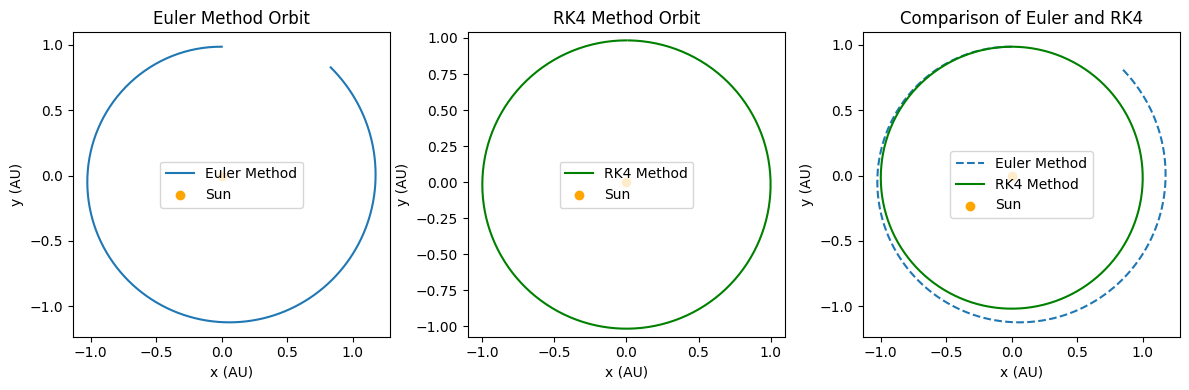

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, state, GM):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return np.array([vx, vy, ax, ay])

def euler_step(f, t, state, dt, GM):
    return state + dt * f(t, state, GM)

def rk4_step(f, t, state, dt, GM):
    k1 = dt * f(t, state, GM)
    k2 = dt * f(t + dt/2, state + k1/2, GM)
    k3 = dt * f(t + dt/2, state + k2/2, GM)
    k4 = dt * f(t + dt, state + k3, GM)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def integrate(method, f, t0, tf, dt, state0, GM):
    t = np.arange(t0, tf, dt)
    states = np.zeros((len(t), len(state0)))
    states[0] = state0
    for i in range(1, len(t)):
        states[i] = method(f, t[i-1], states[i-1], dt, GM)
    return t, states

# Constants
GM = 4 * np.pi**2  # AU^3 / yr^2
a = 1.0  # AU
e = 0.0167  # Eccentricity
y0 = a * (1 - e)
vx0 = -np.sqrt(GM / a * (1 + e) / (1 - e))
initial_state = np.array([0, y0, vx0, 0])
T = 1.0  # Orbital period in years
dt = 0.0025  # Chosen time step

# Integrate
_, states_euler = integrate(euler_step, f, 0, T, dt, initial_state, GM)
_, states_rk4 = integrate(rk4_step, f, 0, T, dt, initial_state, GM)

# Plot orbits
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(states_euler[:, 0], states_euler[:, 1], label='Euler Method')
plt.scatter(0, 0, color='orange', label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.title('Euler Method Orbit')
plt.axis('equal')

plt.subplot(1, 3, 2)
plt.plot(states_rk4[:, 0], states_rk4[:, 1], label='RK4 Method', color='green')
plt.scatter(0, 0, color='orange', label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.title('RK4 Method Orbit')
plt.axis('equal')

plt.subplot(1, 3, 3)
plt.plot(states_euler[:, 0], states_euler[:, 1], label='Euler Method', linestyle='dashed')
plt.plot(states_rk4[:, 0], states_rk4[:, 1], label='RK4 Method', color='green')
plt.scatter(0, 0, color='orange', label='Sun')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.title('Comparison of Euler and RK4')
plt.axis('equal')

plt.tight_layout()
plt.show()

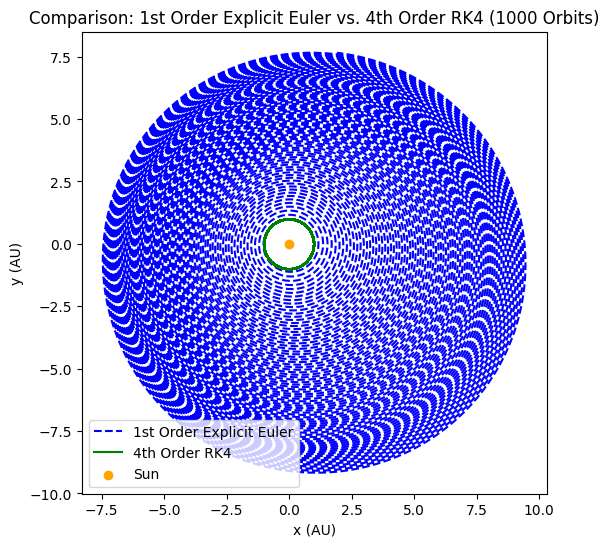

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, state, GM):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return np.array([vx, vy, ax, ay])

def euler_step(f, t, state, dt, GM):
    return state + dt * f(t, state, GM)

def rk4_step(f, t, state, dt, GM):
    k1 = dt * f(t, state, GM)
    k2 = dt * f(t + dt/2, state + k1/2, GM)
    k3 = dt * f(t + dt/2, state + k2/2, GM)
    k4 = dt * f(t + dt, state + k3, GM)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def integrate(method, f, t0, tf, dt, state0, GM):
    t = np.arange(t0, tf, dt)
    states = np.zeros((len(t), len(state0)))
    states[0] = state0
    for i in range(1, len(t)):
        states[i] = method(f, t[i-1], states[i-1], dt, GM)
    return t, states

# Constants
GM = 4 * np.pi**2  # AU^3 / yr^2
a = 1.0  # AU
e = 0.0167  # Eccentricity
y0 = a * (1 - e)
vx0 = -np.sqrt(GM / a * (1 + e) / (1 - e))
initial_state = np.array([0, y0, vx0, 0])
T_extreme = 1000.0  # 1000 orbital periods
dt = 0.0025  # Chosen time step

# Integrate using both methods
_, states_explicit_euler = integrate(euler_step, f, 0, T_extreme, dt, initial_state, GM)
_, states_rk4 = integrate(rk4_step, f, 0, T_extreme, dt, initial_state, GM)

# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(states_explicit_euler[:, 0], states_explicit_euler[:, 1], label='1st Order Explicit Euler', linestyle='dashed', color='blue')
plt.plot(states_rk4[:, 0], states_rk4[:, 1], label='4th Order RK4', color='green')
plt.scatter(0, 0, color='orange', label='Sun')

plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.legend()
plt.title('Comparison: 1st Order Explicit Euler vs. 4th Order RK4 (1000 Orbits)')
plt.axis('equal')
plt.show()

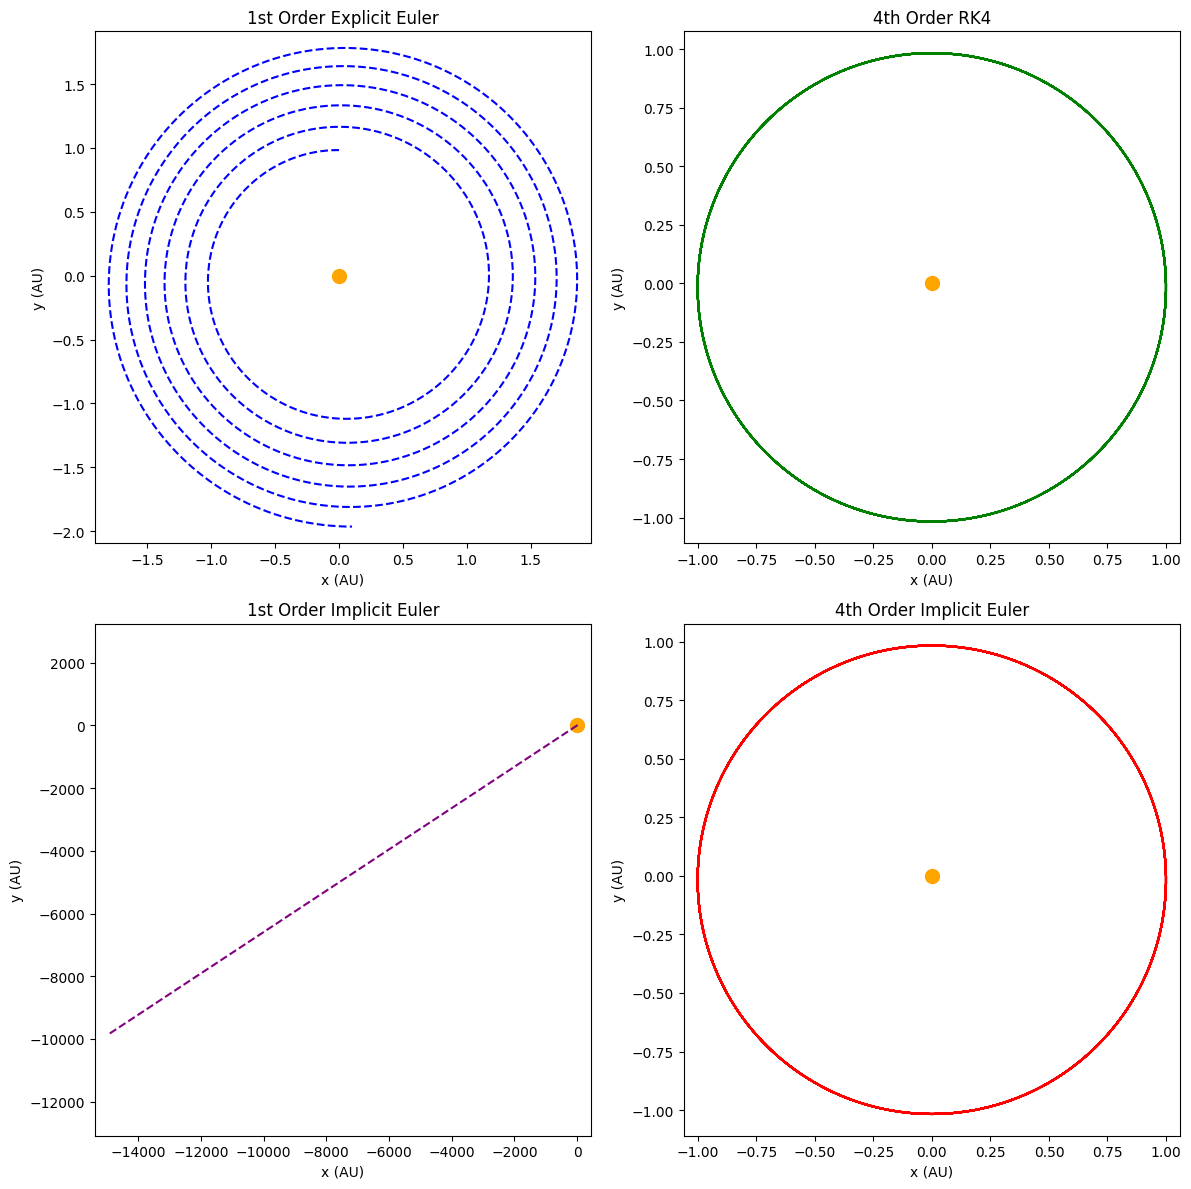

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, state, GM):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -GM * x / r**3
    ay = -GM * y / r**3
    return np.array([vx, vy, ax, ay])

def euler_step(f, t, state, dt, GM):
    return state + dt * f(t, state, GM)

def rk4_step(f, t, state, dt, GM):
    k1 = dt * f(t, state, GM)
    k2 = dt * f(t + dt/2, state + k1/2, GM)
    k3 = dt * f(t + dt/2, state + k2/2, GM)
    k4 = dt * f(t + dt, state + k3, GM)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def implicit_euler_step(f, t, state, dt, GM, tol=1e-6, max_iter=10):
    state_new = state.copy()
    for _ in range(max_iter):
        state_guess = state + dt * f(t + dt, state_new, GM)
        if np.linalg.norm(state_guess - state_new) < tol:
            break
        state_new = state_guess
    return state_new

def fourth_order_implicit_euler(f, t, state, dt, GM):
    k1 = dt * f(t, state, GM)
    k2 = dt * f(t + dt/2, state + k1/2, GM)
    k3 = dt * f(t + dt/2, state + k2/2, GM)
    k4 = dt * f(t + dt, state + k3, GM)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

def integrate(method, f, t0, tf, dt, state0, GM):
    t = np.arange(t0, tf, dt)
    states = np.zeros((len(t), len(state0)))
    states[0] = state0
    for i in range(1, len(t)):
        states[i] = method(f, t[i-1], states[i-1], dt, GM)
    return t, states

# Constants
GM = 4 * np.pi**2  # AU^3 / yr^2
a = 1.0  # AU
e = 0.0167  # Eccentricity
y0 = a * (1 - e)
vx0 = -np.sqrt(GM / a * (1 + e) / (1 - e))
initial_state = np.array([0, y0, vx0, 0])
T_short = 10.0  # 10 orbital periods
dt = 0.0025  # Chosen time step

# Integrate using all methods
_, states_explicit_euler_short = integrate(euler_step, f, 0, T_short, dt, initial_state, GM)
_, states_rk4_short = integrate(rk4_step, f, 0, T_short, dt, initial_state, GM)
_, states_implicit_euler_short = integrate(implicit_euler_step, f, 0, T_short, dt, initial_state, GM)
_, states_fourth_order_implicit_short = integrate(fourth_order_implicit_euler, f, 0, T_short, dt, initial_state, GM)

# Plot each method separately for clarity
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# 1st Order Explicit Euler
axs[0, 0].plot(states_explicit_euler_short[:, 0], states_explicit_euler_short[:, 1], linestyle='dashed', color='blue')
axs[0, 0].scatter(0, 0, color='orange', label='Sun', s=100)
axs[0, 0].set_xlabel('x (AU)')
axs[0, 0].set_ylabel('y (AU)')
axs[0, 0].set_title('1st Order Explicit Euler')
axs[0, 0].axis('equal')

# 4th Order RK4
axs[0, 1].plot(states_rk4_short[:, 0], states_rk4_short[:, 1], color='green')
axs[0, 1].scatter(0, 0, color='orange', label='Sun', s=100)
axs[0, 1].set_xlabel('x (AU)')
axs[0, 1].set_ylabel('y (AU)')
axs[0, 1].set_title('4th Order RK4')
axs[0, 1].axis('equal')

# 1st Order Implicit Euler
axs[1, 0].plot(states_implicit_euler_short[:, 0], states_implicit_euler_short[:, 1], linestyle='dashed', color='purple')
axs[1, 0].scatter(0, 0, color='orange', label='Sun', s=100)
axs[1, 0].set_xlabel('x (AU)')
axs[1, 0].set_ylabel('y (AU)')
axs[1, 0].set_title('1st Order Implicit Euler')
axs[1, 0].axis('equal')

# 4th Order Implicit Euler
axs[1, 1].plot(states_fourth_order_implicit_short[:, 0], states_fourth_order_implicit_short[:, 1], color='red')
axs[1, 1].scatter(0, 0, color='orange', label='Sun', s=100)
axs[1, 1].set_xlabel('x (AU)')
axs[1, 1].set_ylabel('y (AU)')
axs[1, 1].set_title('4th Order Implicit Euler')
axs[1, 1].axis('equal')

plt.tight_layout()
plt.show()